Alex Kosla
Final Project - "Tweet Generator"
COSC 4600

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.models import load_model
import tensorflow as tf
import pandas as pd
import random

import numpy as np
import os
#import time


Using TensorFlow backend.


The datasets we will be working with I obtained and created myself using a Twitter Scraper written by Tom Dickinson[1]. I adapted it to write obtained tweets to file, discarding any metadata, which will not be of use to us in this program. I created two files, both from the same original source: the twitter of Duncan "Thorin" Shields, an esports journalist and analyst that I have followed for many years. I chose him because he has a very large amount of tweets available to use as data, he has a distinct style of tweeting, and no other person, so my knowledge, has attempted to imitate his tweets using Machine Learning.

The 'thorin.txt' file contains pure tweets, not specially separated. Newline characters are appended to tweets for readability in .txt format. 

The 'thorin-firsts.txt' file is slightly different, overlapping in data with 'thorin.txt'. Each scraped tweet is split into words and then the first word (determined by splitting the tweet with " " characters) is written to file, along with a newline character. 

In [3]:
path_to_file = 'thorin.txt'
path_to_firsts = 'thorin-firsts.txt'

Here we open our primary data file, the 'thorin.txt' file. We read it all in as a single string. 

We print the number of characters in the whole dataset to get an idea of the size of the data we're working with.

For similar purposes, we print the first 280 characters of the dataset. 280 because that is the maximum possible length of a tweet. However, it should be noted that not all tweets in the dataset are the same character length. This first piece of data we print out actually consists of two tweets. We can see the final print statement in this chunk of code shows a very different tweet, relating to a very different subject from the first tweet.

In [4]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
print('# of characters in text :'+str(len(text)))

# of characters in text :366148


In [5]:
print(text[:280])

It's obvious that NEO provided the frags in the server and the MVP performances, but TaZ was the heart of the great Polish teams
https://dotesports.com/counter-strike/news/the-thorin-treatment-the-spirit-of-taz-19910 …pic.twitter.com/TuTH8yKH2v
See you soon, mate.
Narrative Wake 


In [6]:
print(text[265:350])

Narrative Wake Episode 21: S8 NA LCS Spring Mega Preview 
@karonmoser

Guests
@CG_Apo


Get the list of all words in the twitter dataset.

First we split using the " " character our string dataset into an array of strings. We also strip the dataset of newline characters, so we don't have words like "\nHello" in our corpus. 

We use the set function which strips down extraneous instances of words, so we only have unique words.
[2]

In [7]:
text_in_words = [w for w in text.split(' ') if w.strip() != '' or w == '\n']
corpus = set(text_in_words) 
print("Total unique words in the corpus: " + str(len(corpus)))

Total unique words in the corpus: 8518


Now we do something very similar to what was done above, except with our first words dataset. We also take a peek at what kinds of things are first words.

In [8]:
# read in all the first words
with open(path_to_firsts, encoding='utf-8') as f:
    firsts = f.read().lower().replace('\n', ' \n ')
print('Length of first words in characters: ' + str(len(text)))

# make a list of all first words in the tweets
firsts_in_words = [w for w in firsts.split(' ') if w.strip() != '' or w == '\n']
print('Corpus of first words, length in words: ' + str(len(firsts_in_words)))

Length of first words in characters: 366148
Corpus of first words, length in words: 5536


In [9]:
print(firsts_in_words[:10])

["it's", '\n', 'see', '\n', 'narrative', '\n', 'nip', '\n', 'congrat', '\n']


In [10]:
# get unique first words
first_vocab = set(firsts_in_words)
print('Size of Corpus of unique first words: ' + str(len(first_vocab)))

Size of Corpus of unique first words: 745


Now it'd be nice to know more about our data before we feed it into our Neural Network. A good way to do that is to get the frequency of words in the data. 

We make a list of nothing but occurences of words in our data. Because we do this by iterating through our list of all unique words in our dataset, the indices of each word in the unique word list will be the same as the indices of the same words in our frequency list. Thus, we can use the zip function to join the two lists together into one single list of tuples. 

We then convert this list of tuples into a pandas dataframe, which we can more easily graph with. We then make a bar chart of some of the most popular words to see which words we're most likely to see.

We do this in both our first words and words datasets.

In [11]:
# get counts of the frequency of each unique word in the list of first words
list_of_frequencies = []
for word in first_vocab:
    list_of_frequencies.append(firsts_in_words.count(word))

firsts_and_freq = list(zip(first_vocab, list_of_frequencies))
firsts_and_freq = sorted(firsts_and_freq, key = lambda x: x[1], reverse=True)

In [12]:
df_firsts = pd.DataFrame(firsts_and_freq, columns =['First word', 'Frequency'])
print(df_firsts[:20])

   First word  Frequency
0          \n       2771
1           i        131
2         the        103
3        it's         86
4         you         71
5          if         63
6        this         63
7    thorin's         47
8        when         34
9          my         23
10       faze         22
11       they         21
12       just         20
13         he         20
14       what         20
15        lol         19
16         so         19
17      great         18
18         c9         17
19     that's         17


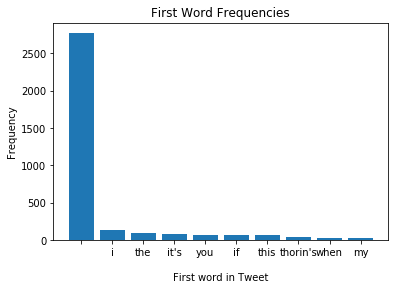

In [13]:
df_to_graph = df_firsts[:10]

%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(df_to_graph['First word'], df_to_graph['Frequency'], align='center')
plt.xlabel('First word in Tweet')
plt.ylabel('Frequency')
plt.title('First Word Frequencies')

plt.show()

In [14]:
# get counts of the frequency of each unique word in the list of first words
list_of_all_frequencies = []
for word in corpus:
    list_of_all_frequencies.append(text_in_words.count(word))

corpus_freq = list(zip(corpus, list_of_all_frequencies))
corpus_freq = sorted(corpus_freq, key = lambda x: x[1], reverse=True)

In [15]:
df_corpus_freq = pd.DataFrame(corpus_freq, columns =['Word', 'Frequency'])
print(df_corpus_freq[:20])

    Word  Frequency
0    the       2191
1     to       1526
2      a       1326
3    and       1214
4     of       1162
5     in        905
6     is        796
7    you        569
8   that        568
9    for        534
10     I        452
11  they        436
12   are        433
13    be        392
14  have        371
15    on        364
16    it        338
17   but        325
18  with        307
19    as        298


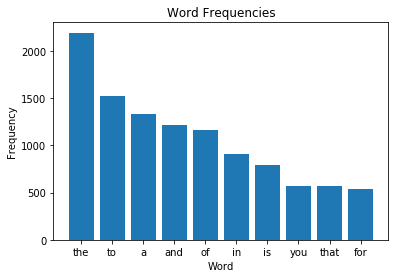

In [16]:
df_corpus_short = df_corpus_freq[:10]
plt.bar(df_corpus_short['Word'], df_corpus_short['Frequency'], align='center')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequencies')

plt.show()

It's come time to start more directly preparing our data for use in a Neural Network. We use the set function again to get all unique characters in the text dataset, and then use numpy to pass it to an array, which will make it easier to work with. [3]

In [17]:
vocab = sorted(set(text))
print('# of unique characters = '+str(len(vocab)))

# of unique characters = 118


In [18]:
print(np.array(vocab))

['\n' ' ' '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0'
 '1' '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A' 'B'
 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'W' 'X' 'Y' 'Z' '[' ']' '_' '`' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z'
 '\xa0' 'À' 'è' 'é' 'ú' 'ă' 'ć' 'Č' 'š' 'М' 'Т' 'а' 'д' 'е' 'ж' 'к' 'л'
 'о' 'р' 'т' 'ц' 'ы' 'ь' '’' '…' '이' '팅' '화']


Here we go for a pseudo one-hot encoding setup for our data, assigning each specific character a value. One-hot encoding requires an entire vector for each character, but this approach requires only a single integer, but the thought process is similar. That means that we can use char2idx to translate any character into a specific index in our encoding and use idx2char to decode it. We then translate our entire dataset into an array of ints.

We do this because Neural Networks are designed around manipulating numbers, so we have to give ours numbers, rather than to process. 

You can see in our print statement below what a one-hot encoded string looks like.

In [19]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])


In [20]:
print(text_as_int[:70])
print("is equivalent to:")
print(text[:70])

[42 83  8 82  1 78 65 85 72 78 84 82  1 83 71 64 83  1 47 38 48  1 79 81
 78 85 72 67 68 67  1 83 71 68  1 69 81 64 70 82  1 72 77  1 83 71 68  1
 82 68 81 85 68 81  1 64 77 67  1 83 71 68  1 46 55 49  1 79 68 81]
is equivalent to:
It's obvious that NEO provided the frags in the server and the MVP per


We can't feed in all of our data at once to the Neural Network, so we split it up into sequences of characters. We specify a length for our sequences we'll feed into the neural network, and alter our input data so it's in a format the Neural Network will take, before splitting it into sequences.

In [21]:
# The maximum length sentence we want for a single input in characters
seq_length = 70
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
print(char_dataset)
for i in char_dataset.take(7):
  print(idx2char[i])


<TensorSliceDataset shapes: (), types: tf.int64>
I
t
'
s
 
o
b


In [22]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(3):
  print(repr(''.join(idx2char[item]))) #repr(item) is similar to str(item), but more precise

"It's obvious that NEO provided the frags in the server and the MVP perf"
'ormances, but TaZ was the heart of the great Polish teams\nhttps://dotes'
'ports.com/counter-strike/news/the-thorin-treatment-the-spirit-of-taz-19'


Keeping with our theme of getting our data to be in a workable format for a Neural Network, we create a MapDataset object that will allow us to take a sequence and split it into input and target text. We are using an RNN, so it's very important we can separate inputs and targets. RNNs take an input and try to guess the next, so we need a way to help ours achieve that. You can see that this formats things so that our target text is always shifted to the right 1 full character of whatever our input text is. 
What that means is that given 70 characters worth of data in our sequence, we try to guess the next character after that, and then use whatever we guessed with as another input, recursively completing the task.

In [23]:
# set up the datasets to automatically use their first character 
# to attempt to predict the remaining characters in the chunk
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

print(dataset)

<MapDataset shapes: ((70,), (70,)), types: (tf.int64, tf.int64)>


In [24]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))


Input data:  "It's obvious that NEO provided the frags in the server and the MVP per"
Target data: "t's obvious that NEO provided the frags in the server and the MVP perf"


Now we're gonna define some arguments we'll use in our model. We'll cut our data into chunks again to feed into the model, and shuffle them up to prevent overfitting. The buffer is there to shuffle elements in, otherwise tensorflow could use up too much memory.

We will feed in our chars, so we have vocab_size to handle the shape of that.

Our embedding dimension and number of rnn units determine the size of our layers. If they are too big, they could overfit. If they are too small, they could underfit. I found these values to be nice compromises that yielded good results, though they do take a fair bit to train.

In [25]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

print(dataset)

<BatchDataset shapes: ((64, 70), (64, 70)), types: (tf.int64, tf.int64)>


In [26]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024


We now can actually build our model. We will be using 5 sequential layers, a modified version of the TensorFlow guide [3]. 
    1. The Embedding layer. Our input layer that takes in our data.
    2. A Gated Recurrent Unit. This is a form of an RNN that produces slightly better results compared to an LSTM, but in shorter amounts of time. [4] 
    3. A dropout layer of 15%. This is to avoid overfitting and to make fitting a bit faster. 
    4. Another GRU of similar size.
    5. A Dense output layer with vocab_size outputs. 
    
We then build our model and compile it using the adam optimizer (an all-around great optimzer) and a sparse-categorical-crossentropy loss function, which is good for integer-encoded data representations.

In [27]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(512,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),      
    tf.keras.layers.Dense(vocab_size)
  ])
  return model


In [28]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [ ]:
model.summary()

In [29]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)


In [30]:
model.compile(optimizer='adam', loss=loss)

In order to test our RNN, we will need to alter it a little bit to handle only a single string of input rather than a full batch. Thus, we'll need to save our weights after each fit if we want to get an idea of accuracy for each epoch. [3]

I've opted to train the RNN for only 5 Epochs for time's sake, though more epochs will surely yield better results.

In [31]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints-new'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [32]:
# I'll probably do like EPOCHS=20 for the writeup, 
# but I know you have to be able to run this on your computer
EPOCHS=5

We need to define a way to actually use our model once we have trained it. The vast majority of RNNs, from what I've seen, require the user to input a string and only produce text, with no attempt at an accuracy metric.

My generate_text function (adapted from tensorflow's guide) [3] takes in a corpus in addition to a model and a starting string. We generate 10 tweets' worth of characters, make words out of them, and then compare the created words to the ones in our corpus. We then make a hit ratio of what percentage of generated words were words actually in our corpus (words tweeted by Thorin). 

This is by no means a perfect accuracy metric, but I thought it would be nice to have something to tell us we're going in the right direction. Reducing the temperature variable below increases the accuracy, but it becomes less and less like a Thorin tweet. In my experiments, values around 0.5 or below would only produce some of the most popular words in the corpus. For example, a sentence consisting of "a the a the the a the the the." All words in the corpus, but nothing like something an actual human would say.

We return a single tweet's worth snippet of text and the accuracy. The first is printed for transparency of how the RNN is doing and the accuracy is saved for later.


In [33]:
def generate_text(model, start_string, corpus):
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = 2800

    # one-hot encoding our start string
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperatures results in more predictable text.
    # Higher temperatures results in more surprising text.
    temperature = 0.75

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the word returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted word as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

    text_generated = ''.join(text_generated)
    arr_generated_text = text_generated.split(' ')
    corpus_hits = 0
    for word in arr_generated_text:
        if(word in corpus):
            corpus_hits += 1

    corpus_accuracy = corpus_hits / len(arr_generated_text)
            
    return (text_generated[:280], corpus_accuracy)


The fit loop runs one epoch at a time until it reaches amount of epochs requested. It begins with a fresh model, and later loads saved weights to avoid redundancy. Each time it:
    1. compiles the model
    2. performs one epoch of fitting
    3. saves its loss value for the current epoch
    4. saves its weights
    5. makes an altered model for testing purposes
    6. picks a random first word from the list of first words for use as an input string
    7. uses the altered model, corpus, and input string with generate_text
    8. prints a snippet of generated text and the accuracy for the current epoch
    9. saves the accuracy for the current epoch

In [34]:
def fit_loop(dataset, checkpoint_callback, vocab_size,
             embedding_dim, rnn_units, BATCH_SIZE, EPOCHS):
    accuracies = []
    losses = []
    for i in range(EPOCHS):
        if(i == 0):
            model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)
            model.compile('adam', loss)
        else:
            print("\n\n")
            model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            model.compile('adam', loss)

        history = model.fit(dataset, epochs=1, callbacks=[checkpoint_callback])
        losses.append(history.history['loss'][0])

        model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
        model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
        model.build(tf.TensorShape([1, None]))

        start_string = random.choice(firsts_in_words)
        results = generate_text(model, start_string, corpus)

        #avoid printing "\n", which will just print as a newline
        if(start_string == "\n"):
            start_string = "\\n"

        print("\nGenerated text after "+ str(i+1) +" epoch(s) with start_string \""+start_string+"\"\n" + 
              start_string + results[0])
        print("\n\nAccuracy of: " + str(results[1]))
        accuracies.append(results[1])
        
    return losses, accuracies


In [35]:
result_data = fit_loop(dataset, checkpoint_callback, vocab_size,
               embedding_dim, rnn_units, BATCH_SIZE, EPOCHS)

80/80 [==============================] - 307s 4s/step - loss: 3.3879

Generated text after 1 epoch(s) with start_string "xyp9x"
xyp9x2.0;Xдug ……ominl inet on the be and ance so al facilte he har ik sols the as an cotus to is satsind hats thaulpe the fok tor they penon ad to gatt the the ge foulin sol tal ad chin pan imeon is an ouf ouce wo the son an th e rine so thin the the the int ther cint juren the the ro


Accuracy of: 0.3547351524879615



80/80 [==============================] - 310s 4s/step - loss: 2.4284

Generated text after 2 epoch(s) with start_string "c9"
c9$0t8/I //www.cotus/9ttwitcerexportess/wittes.com/4013013803386
Wot's tasen the they roping ine.
Wenicacchly andout and aves the tyere it wouts nowine ave onenting anderts in endore woont deonso and is are of hourd whel and to pealid somesust to who end ofching to kane and a offr-


Accuracy of: 0.5028571428571429


Using our saved losses and accuracies, we can see how our model improves over time. I included graphs to visualize how this.

In [36]:
result_data = np.array(result_data)
x = np.arange(1, len(result_data[0])+1)

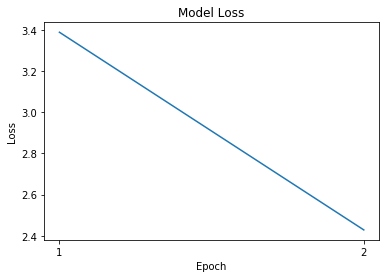

In [37]:
plt.plot(x, result_data[0])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(x)
plt.show()

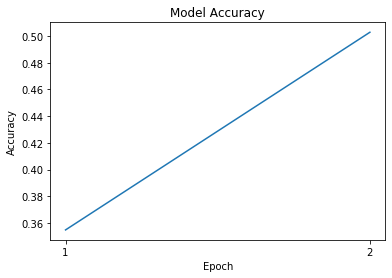

In [38]:
plt.plot(x, result_data[1])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(x)
plt.show()

Bibliography

[1] https://github.com/tomkdickinson/Twitter-Search-API-Python

[2] E. A., "Word-level LSTM text generator. Creating automatic song lyrics with Neural Networks.", Medium, 2019. [Online]. Available: https://medium.com/coinmonks/word-level-lstm-text-generator-creating-automatic-song-lyrics-with-neural-networks-b8a1617104fb. [Accessed: 22- Nov- 2019]

[3] "Text generation with an RNN", TensorFlow, 2019. [Online]. Available: https://www.tensorflow.org/tutorials/text/text_generation. [Accessed: 22- Nov- 2019]

[4] https://arxiv.org/pdf/1412.3555v1.pdf